# Kelompok 1 Algoritma Deep Learning

Quiz M11 - 6 Januari 2025

Anggota Kelompok :
1. A IAS Falah Surya Gemilang - 50421001
2. Aldo Rizky Ramadhan - 50421106
3. Faiz Rizki Azmi - 50421454
4. Muhamad Ibnu Khaidar Hafiz - 50421867
5. Siti Asma Tomu - 51421427

Kode ini bisa dilihat di github :

[Notebook Link Asli](https://github.com/Cleign1/algoritma-deep-learning-gundar/blob/main/tugas7_quizM11/cnn_quiz.ipynb)

In [1]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import os
import pandas as pd
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


2025-01-07 14:00:31.197719: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-07 14:00:31.215550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-07 14:00:31.236685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-07 14:00:31.243005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-07 14:00:31.258346: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf.__version__

'2.17.0'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Tue Jan  7 14:00:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      On  |   00000000:00:03.0 Off |                    0 |
| N/A   73C    P8             21W /   72W |       4MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install kaggle

  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105785 sha256=9bb6eebf410d74f35a4604e2ca5be762d8c78e90cb8bc6fe93f571d6ac0ed969
  Stored in directory: /home/ibnuk/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle


In [6]:
! mkdir ~/.kaggle
! cp kaggle_API_key.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle_API_key.json

In [7]:
! kaggle datasets download alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
100%|████████████████████████████████████████| 586M/586M [00:26<00:00, 24.5MB/s]
100%|████████████████████████████████████████| 586M/586M [00:26<00:00, 23.1MB/s]


In [8]:
! unzip animals10.zip

Archive:  animals10.zip
  inflating: raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg  
  inflating: raw-img/cane/OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg  
  inflating: raw-img/cane/OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg  
  inflating: raw-img/cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg  
  inflating: raw-img/cane/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg  
  inflating: raw-img/cane/OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg  
  inflating: raw-img/cane/OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg  
  inflating: raw-img/cane/OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg  
  inflating: raw-img/cane/OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg  
  inflating: raw-img/cane/OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg  
  inflating: raw-img/cane/OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg  
  inflating: raw-img/cane/OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg  
  inflating: raw-img/cane/OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg  
  inflating: raw-img/cane/OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg  
  inflating: raw-img/cane/OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg  
  inflating: raw-img

In [14]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2025-01-06 07:30:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-06 07:30:50 (114 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
def convert_path_to_df(dataset):
    image_dir = Path(dataset)

    # Get filepaths and labels
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

image_df = convert_path_to_df("raw-img")

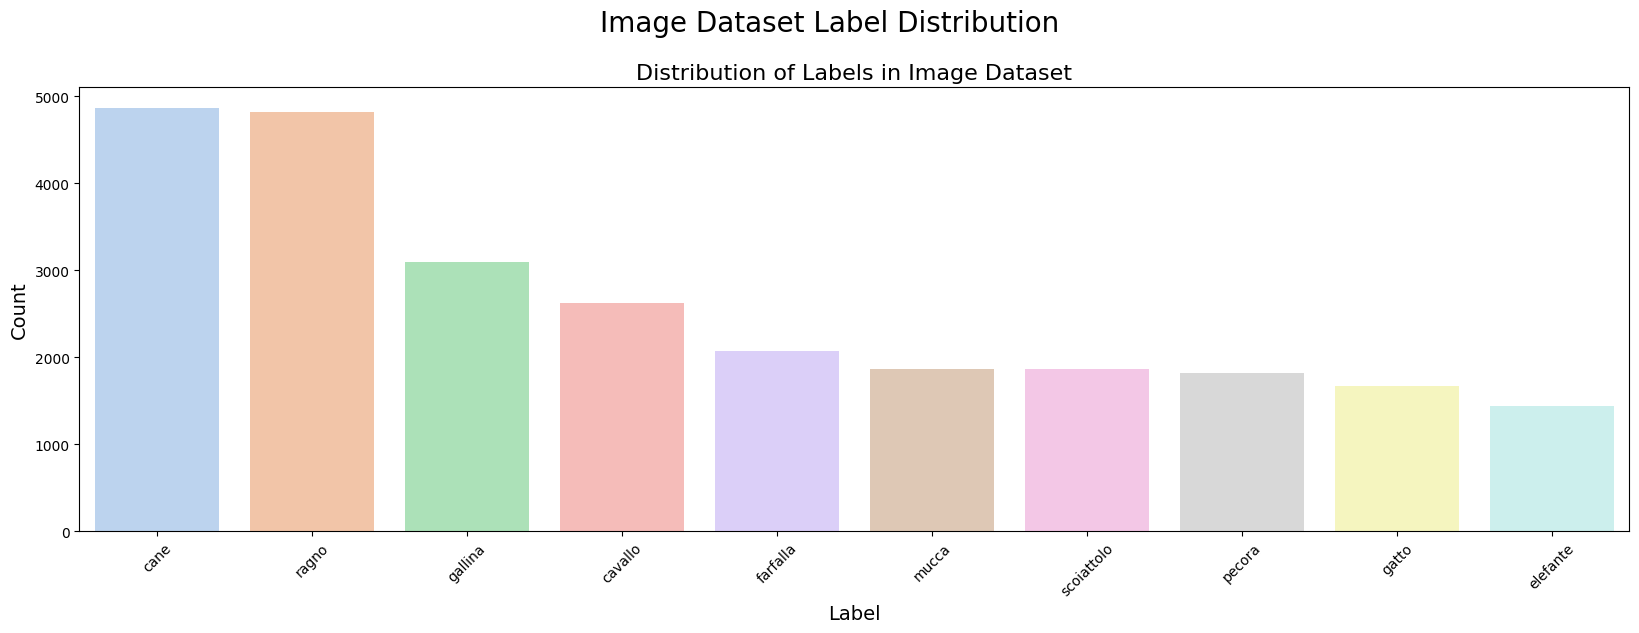

In [6]:
label_counts = image_df['Label'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='pastel', ax=axes)
axes.set_title('Distribution of Labels in Image Dataset', fontsize=16)
axes.set_xlabel('Label', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_xticklabels(label_counts.index, rotation=45)

fig.suptitle('Image Dataset Label Distribution', fontsize=20)

fig.subplots_adjust(top=0.85)

plt.show()

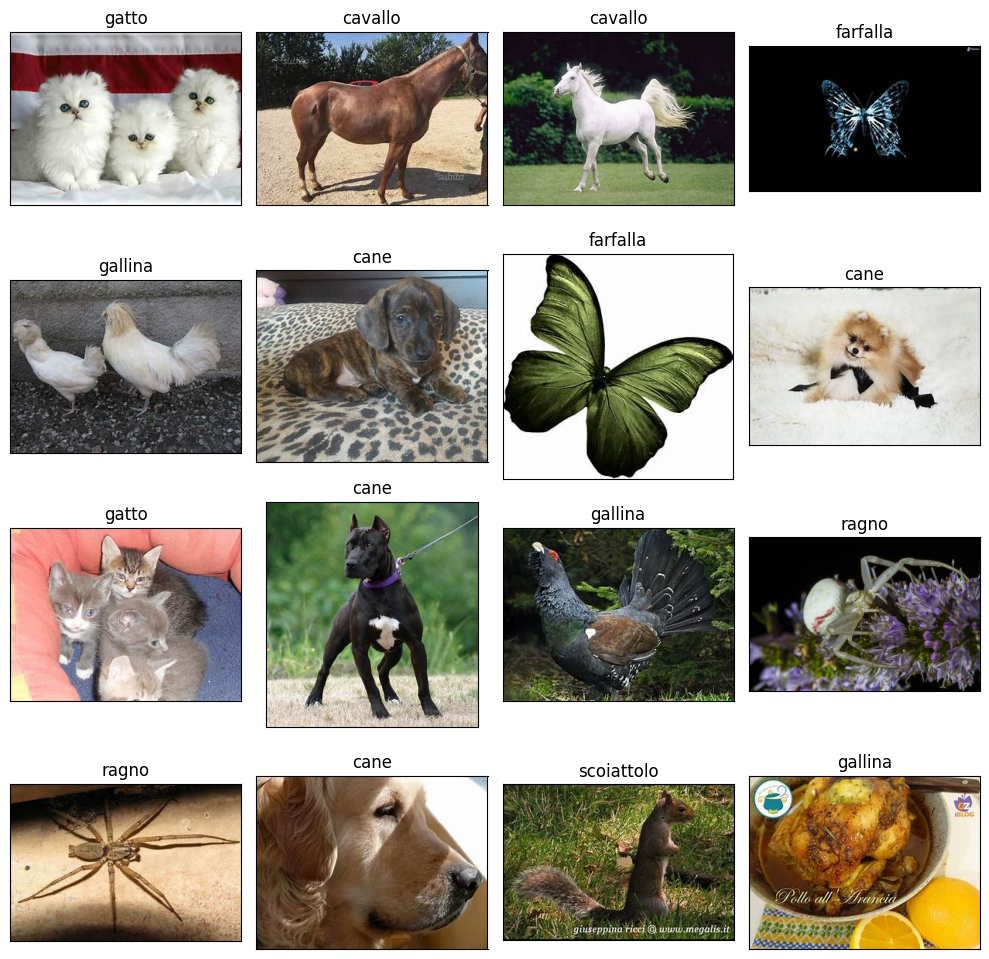

In [7]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [8]:
train_dataset, validation_dataset = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [9]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

In [11]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_dataset,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_dataset,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=validation_dataset,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 16722 validated image filenames belonging to 10 classes.
Found 4180 validated image filenames belonging to 10 classes.
Found 5226 validated image filenames belonging to 10 classes.


In [12]:
augment = tf.keras.Sequential([
  tf.keras.layers.Resizing(224,224),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.RandomContrast(0.1),
])

2025-01-07 14:01:30.587892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20750 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


In [13]:
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB7(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5,
                                                  restore_best_weights = True)

In [15]:
inputs = pretrained_model.input
x = augment(inputs)

x = tf.keras.layers.Dense(64, activation='relu')(pretrained_model.output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(train_images,
                    steps_per_epoch=len(train_images),
                    validation_data=val_images,
                    validation_steps=len(val_images),
                    epochs=15,
                    callbacks=[early_stopping])

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1736258536.609700    8544 service.cc:146] XLA service 0x7f53ac013920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736258536.609750    8544 service.cc:154]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2025-01-07 14:02:17.909714: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-07 14:02:22.647057: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8904


  1/523 ━━━━━━━━━━━━━━━━━━━━ 10:23:19 72s/step - accuracy: 0.1250 - loss: 2.8858

I0000 00:00:1736258575.250016    8544 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


523/523 ━━━━━━━━━━━━━━━━━━━━ 220s 285ms/step - accuracy: 0.6405 - loss: 1.1685 - val_accuracy: 0.9543 - val_loss: 0.1812
Epoch 2/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15


2025-01-07 14:05:24.090169: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-01-07 14:05:24.091931: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2025-01-07 14:05:24.147453: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py

523/523 ━━━━━━━━━━━━━━━━━━━━ 82s 157ms/step - accuracy: 0.9280 - loss: 0.2762 - val_accuracy: 0.9629 - val_loss: 0.1353
Epoch 4/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15


2025-01-07 14:06:46.675979: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


523/523 ━━━━━━━━━━━━━━━━━━━━ 82s 157ms/step - accuracy: 0.9400 - loss: 0.2151 - val_accuracy: 0.9667 - val_loss: 0.1192
Epoch 6/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 83s 157ms/step - accuracy: 0.9535 - loss: 0.1710 - val_accuracy: 0.9682 - val_loss: 0.1084
Epoch 8/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15


2025-01-07 14:09:31.674550: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


523/523 ━━━━━━━━━━━━━━━━━━━━ 83s 158ms/step - accuracy: 0.9563 - loss: 0.1536 - val_accuracy: 0.9699 - val_loss: 0.1039
Epoch 10/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.9648 - loss: 0.1289 - val_accuracy: 0.9663 - val_loss: 0.1174
Epoch 12/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.9644 - loss: 0.1255 - val_accuracy: 0.9730 - val_loss: 0.0977
Epoch 14/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - accuracy: 0.9661 - loss: 0.1167 - val_accuracy: 0.9732 - val_loss: 0.1007


In [18]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.12953
Test Accuracy: 96.27%


In [19]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

164/164 ━━━━━━━━━━━━━━━━━━━━ 50s 211ms/step
The first 5 predictions: ['ragno', 'cavallo', 'elefante', 'pecora', 'ragno']


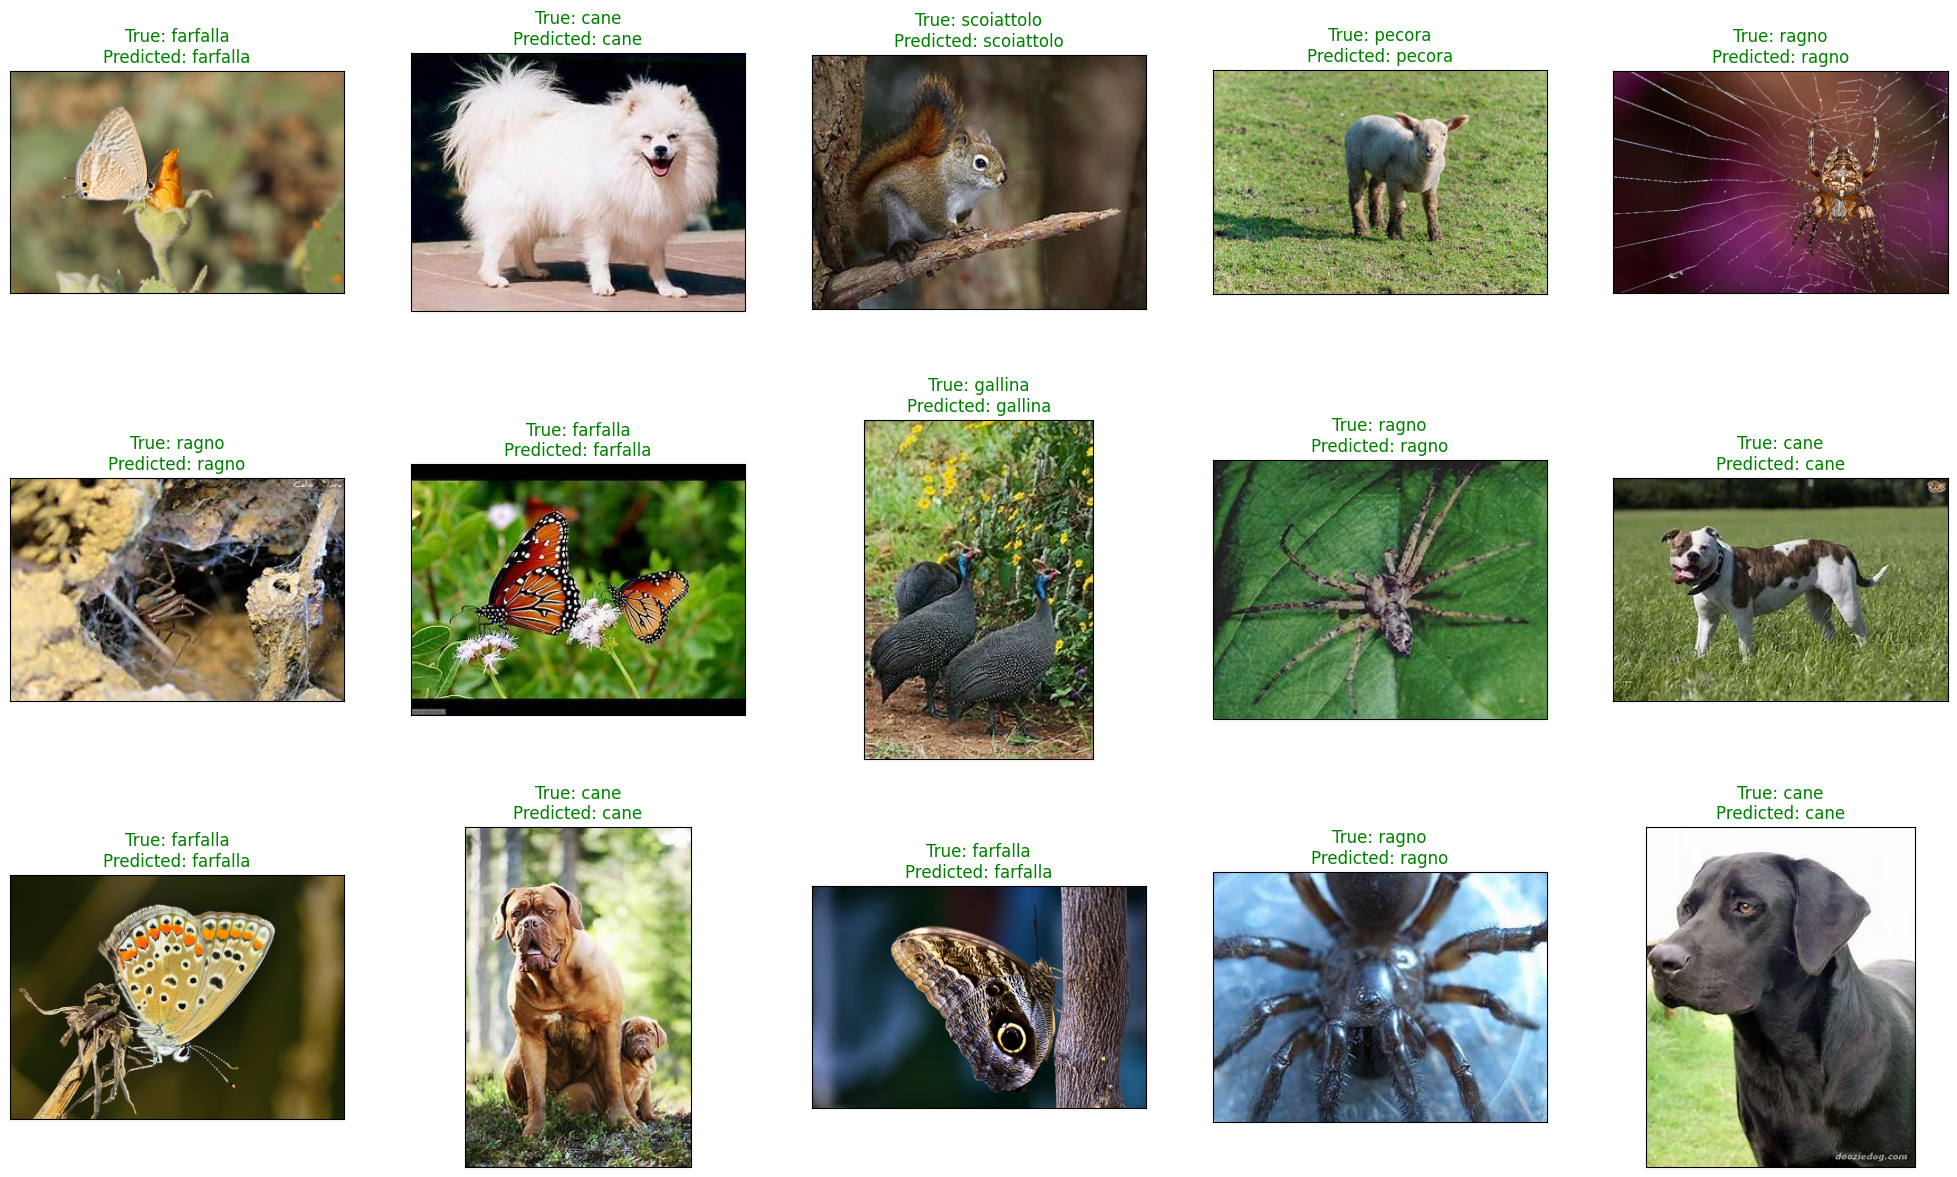

<Figure size 640x480 with 0 Axes>

In [20]:
random_index = np.random.randint(0, len(validation_dataset) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validation_dataset.Filepath.iloc[random_index[i]]))
    if validation_dataset.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {validation_dataset.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [21]:
y_test = list(validation_dataset.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        cane       0.95      0.98      0.97       935
     cavallo       0.96      0.95      0.96       544
    elefante       0.96      0.98      0.97       294
    farfalla       0.96      0.95      0.95       412
     gallina       0.97      0.98      0.97       613
       gatto       0.98      0.95      0.97       324
       mucca       0.95      0.90      0.92       411
      pecora       0.94      0.92      0.93       359
       ragno       0.98      0.99      0.98       957
  scoiattolo       0.98      0.96      0.97       377

    accuracy                           0.96      5226
   macro avg       0.96      0.96      0.96      5226
weighted avg       0.96      0.96      0.96      5226



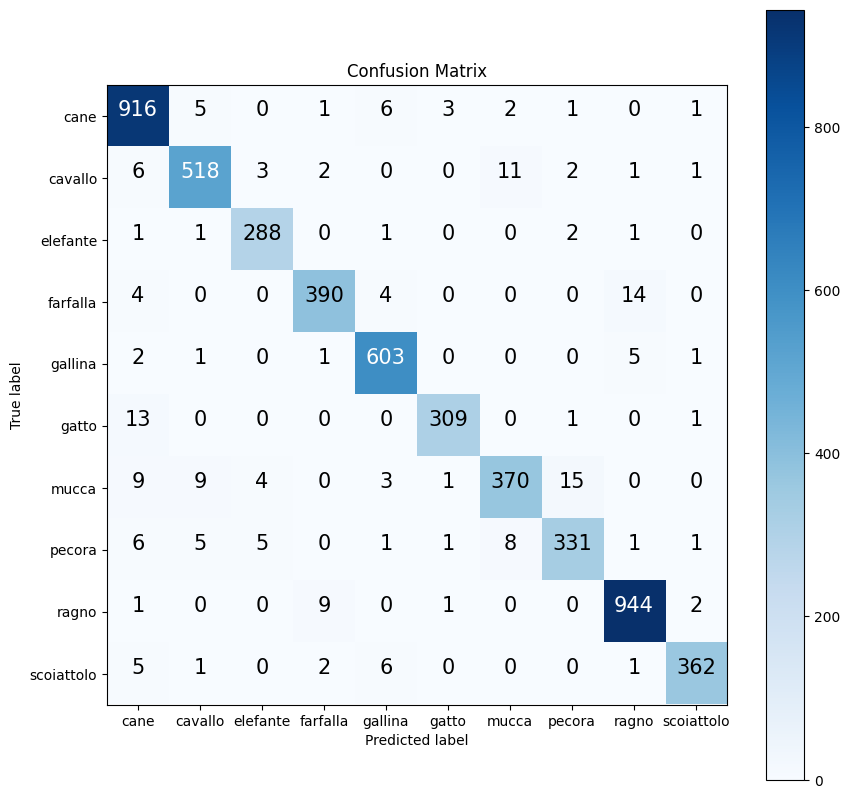

In [22]:
from helper_functions import make_confusion_matrix

make_confusion_matrix(y_test, pred, list(labels.values()))